# BANK LOAN ANALYSIS

## Import Libraries

In [3]:
import os, pandas as pd

# path to dataset
path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"

# confirm file exists
print("Exists?", os.path.exists(path))

# load dataset
try:
    df = pd.read_csv(path, low_memory=False)
    print("Loaded:", df.shape)
except Exception as e:
    print("LOAD ERROR:", type(e).__name__, e)


Exists? True
Loaded: (38576, 24)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.byplot as plt
import seaborn as sb
import warnings
import plotly.express as px


ModuleNotFoundError: No module named 'matplotlib.byplot'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import plotly.express as px


In [ ]:
df = pd.read.excel("D:/other4/Capstone Projects/Bank Loans Capstone/data/raw/financial_loan.csv")

In [ ]:
df = pd.read_excel("D:/other4/Capstone Projects/Bank Loans Capstone/data/raw/financial_loan.csv")

In [ ]:
pd.read_excel("D:/other4/Capstone Projects/Bank Loans Capstone/data/raw/financial_loan.xlsx")

In [ ]:
df.head

In [ ]:
df.head()

In [ ]:
df = pd.read_excel("D:/other4/Capstone Projects/Bank Loans Capstone/data/raw/financial_loan.xlsx")

In [ ]:
df.head()

In [ ]:
df.tail()

### Metadata of data

In [ ]:
print("No of rows:", df.shape[0])

In [ ]:
import os

path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"
print("Exists?", os.path.exists(path))


In [ ]:
import pandas as pd, os
path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"
print("path:", path)
print("exists:", os.path.exists(path))


In [ ]:
# If CSV
df = pd.read_csv(path, low_memory=False)
# If that errors (Excel file), use:
# df = pd.read_excel(path)
print("loaded:", isinstance(df, pd.DataFrame))


In [ ]:
print("No of rows:", df.shape[0])

In [ ]:
print("No of columns:", df.shape[])

print("No of columns:", df.shape[1])

In [ ]:
df.info

### Datatypes

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
total_loan_applications = df['id'].count()
print("Total Loan Applications:",  total_loan_applications)

total_loan_applications = df['id'].count()
print("Total Loan Applications:",  total_loan_applications)

### MTD Total Loan Applications

In [17]:
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue.date'].dt.year == latest_year) & (df['issue.date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")

MTD Loan Applications (for December 2021): 1


In [18]:
print(df.columns.tolist())

['id', 'address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue.date']


In [19]:
for i,col in enumerate(df.columns):
    print(i, repr(col))

0 'id'
1 'address_state'
2 'application_type'
3 'emp_length'
4 'emp_title'
5 'grade'
6 'home_ownership'
7 'issue_date'
8 'last_credit_pull_date'
9 'last_payment_date'
10 'loan_status'
11 'next_payment_date'
12 'member_id'
13 'purpose'
14 'sub_grade'
15 'term'
16 'verification_status'
17 'annual_income'
18 'dti'
19 'installment'
20 'int_rate'
21 'loan_amount'
22 'total_acc'
23 'total_payment'
24 'issue.date'


In [20]:
import re
def clean(c):
    c = str(c).strip()
    c = re.sub(r'\s+','_', c)            # spaces -> underscore
    c = re.sub(r'[^\w]','_', c)          # non-word -> underscore (dots -> _)
    c = re.sub(r'_+','_', c)             # collapse multiple underscores
    return c.lower().strip('_')

df.columns = [clean(c) for c in df.columns]
print("Normalized columns:", df.columns.tolist())


Normalized columns: ['id', 'address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date']


In [21]:
latest = df['issue_date'].max()
latest_year, latest_month = latest.year, latest.month

mtd = df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]
print(f"MTD Loan Applications (for {latest.strftime('%B %Y')}): {mtd['id'].count()}")

AttributeError: 'Series' object has no attribute 'year'

In [22]:
print(df.columns.tolist())
print(df.columns.duplicated().any())   # True if duplicates exist


['id', 'address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date']
True


In [23]:
df = df.loc[:, ~df.columns.duplicated()]
print("After removing duplicates:", df.columns.tolist())


After removing duplicates: ['id', 'address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']


In [24]:
print(df['issue_date'].dtype)


datetime64[ns]


In [25]:
# Find latest issue date
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter data for month-to-date
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]

# Count loan applications
mtd_loan_applications = mtd_data['id'].count()

# Print result
print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD Loan Applications (for December 2021): 1


In [26]:
print(df['issue_date'].dtype)
print(df['issue_date'].min(), "→", df['issue_date'].max())


datetime64[ns]
2021-01-01 00:00:00 → 2021-12-12 00:00:00


In [27]:
latest = df['issue_date'].max()
check = df[(df['issue_date'].dt.year == latest.year) &
           (df['issue_date'].dt.month == latest.month)]
print("Latest issue_date:", latest)
print("Rows in that month:", check.shape[0])


Latest issue_date: 2021-12-12 00:00:00
Rows in that month: 1


In [28]:
# Force filter to December 2021, like in tutorial
dec21_data = df[(df['issue_date'].dt.year == 2021) & (df['issue_date'].dt.month == 12)]

# Count loan applications
dec21_count = dec21_data['id'].count()

print(f"Loan Applications (Dec 2021): {dec21_count}")


Loan Applications (Dec 2021): 1


### Total Funded Amount

In [35]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1_000_000

print(f"Total Funded Amount : ${total_funded_amount_millions:.2f}M")


Total Funded Amount : $435.76M


### MTD Funded Amount

In [42]:
latest = df['issue_date'].max()
latest_year = latest.year
latest_month = latest.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
           (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000
print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")





MTD Total Funded Amount: $0.01M


### Total Amount Received

In [44]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount / 1_000_000

print(f"Total Amount Received: ${total_funded_amount_millions:.2f}M")

Total Amount Received: $473.07M


### MTD Total Amount Received

In [45]:
latest = df['issue_date'].max()
latest_year = latest.year
latest_month = latest.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
           (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")

MTD Total Funded Amount: $0.01M


### Average Interest Rate


In [46]:
import os, hashlib
paths = [r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv",
         r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.xlsx"]
for p in paths:
    if os.path.exists(p):
        with open(p,'rb') as f:
            b = f.read()
        print(p, "size:", len(b), "sha256:", hashlib.sha256(b).hexdigest()[:12])
    else:
        print(p, "NOT FOUND")


D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv size: 7805690 sha256: 29f86ecd2a11
D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.xlsx size: 5870978 sha256: df97bc5e10b1


In [47]:
import pandas as pd

path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"
df = pd.read_csv(path, low_memory=False, parse_dates=['issue_date'])
print("Rows:", df.shape[0])
print("Date range:", df['issue_date'].min(), "→", df['issue_date'].max())


Rows: 38576
Date range: 01-01-2021 → 25-02-2021


In [48]:
latest = df['issue_date'].max()
latest_year = latest.year
latest_month = latest.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
           (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")

AttributeError: 'str' object has no attribute 'year'

In [49]:
import pandas as pd

path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"
df = pd.read_csv(path, low_memory=False)

# force proper datetime conversion
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

print("Rows:", df.shape[0])
print("Date range:", df['issue_date'].min(), "→", df['issue_date'].max())
print("Dtype:", df['issue_date'].dtype)


Rows: 38576
Date range: 2021-01-01 00:00:00 → 2021-12-12 00:00:00
Dtype: datetime64[ns]


In [50]:
latest = df['issue_date'].max()
latest_year, latest_month = latest.year, latest.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000

print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")


MTD Total Funded Amount: $0.01M


In [51]:
print(df[['issue_date','loan_amount']].dtypes)
display(df[['issue_date','loan_amount']].head(10))


issue_date     datetime64[ns]
loan_amount             int64
dtype: object


,issue_date,loan_amount
0,2021-11-02,2500
1,2021-01-01,3000
2,2021-05-01,12000
3,NaT,4500
4,2021-01-01,3500
5,NaT,8000
6,NaT,6000
7,2021-11-06,5500
8,2021-02-09,24000
9,2021-09-02,4125


In [52]:
# see how loan_amount looks
print("loan_amount dtype:", df['loan_amount'].dtype)
# rows where loan_amount cannot be converted cleanly
bad = df[~df['loan_amount'].astype(str).str.replace(r'[,\$ ]','', regex=True).str.match(r'^\d+(\.\d+)?$')]
print("bad loan_amount rows:", bad.shape[0])
display(bad.head(6))


loan_amount dtype: int64
bad loan_amount rows: 0


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment


In [53]:
s = df['loan_amount'].astype(str).str.replace(r'[,\$ ]','', regex=True)
s = pd.to_numeric(s, errors='coerce')
print("total funded (all):", s.sum())
# MTD after parsing dates and numeric
dates = pd.to_datetime(df['issue_date'], errors='coerce')
m = dates.max()
mtd_mask = (dates.dt.year==m.year) & (dates.dt.month==m.month)
print("rows in latest month:", mtd_mask.sum())
print("mtd funded:", s[mtd_mask].sum())


total funded (all): 435757075
rows in latest month: 1
mtd funded: 5000


In [54]:
# show column names and first 20 raw strings (repr shows hidden chars)
print(df.columns.tolist())
print("\nRaw issue_date samples (repr):")
for i,val in enumerate(df['issue_date'].astype(str).head(20)):
    print(i, repr(val))


['id', 'address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

Raw issue_date samples (repr):
0 '2021-11-02'
1 '2021-01-01'
2 '2021-05-01'
3 'NaT'
4 '2021-01-01'
5 'NaT'
6 'NaT'
7 '2021-11-06'
8 '2021-02-09'
9 '2021-09-02'
10 'NaT'
11 '2021-11-09'
12 '2021-11-08'
13 '2021-11-12'
14 '2021-11-10'
15 '2021-11-12'
16 '2021-02-12'
17 '2021-09-10'
18 '2021-12-12'
19 '2021-02-02'


In [55]:
mask_raw = df['issue_date'].astype(str).str.contains("2021-12", na=False)
print("Raw contains '2021-12' count:", mask_raw.sum())
display(df.loc[mask_raw, ['issue_date']].head(20))


Raw contains '2021-12' count: 1


,issue_date
18,2021-12-12


In [56]:
dates = pd.to_datetime(df['issue_date'], errors='coerce')
print("Parsed dtype:", dates.dtype)
mask_parsed = (dates.dt.year==2021) & (dates.dt.month==12)
print("Parsed Dec 2021 count:", mask_parsed.sum())
display(df.loc[mask_parsed, ['issue_date']].head(20))


Parsed dtype: datetime64[ns]
Parsed Dec 2021 count: 1


,issue_date
18,2021-12-12


In [57]:
problem = mask_raw & ~mask_parsed
print("Raw shows Dec but parsed doesn't:", problem.sum())
display(df.loc[problem, ['issue_date']].head(20))


Raw shows Dec but parsed doesn't: 0


,issue_date


In [58]:
# How many rows are NaT?
print("NaT count:", df['issue_date'].isna().sum())
print("Total rows:", len(df))

# Unique values in issue_date (string form)
print(df['issue_date'].astype(str).value_counts().head(20))


NaT count: 4
Total rows: 38576
issue_date
2021-11-12    2188
2021-11-11    2120
2021-11-10    2025
2021-11-09    1980
2021-11-08    1873
2021-11-07    1787
2021-11-06    1768
2021-11-05    1629
2021-11-04    1506
2021-11-03    1398
2021-11-01    1336
2021-11-02    1240
2021-10-12    1220
2021-10-11    1095
2021-10-07    1091
2021-10-10    1083
2021-10-09    1058
2021-10-08    1056
2021-10-06     995
2021-10-05     892
Name: count, dtype: int64


In [59]:
# Convert issue_date to datetime if not already
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

# Get the latest year-month
latest_period = df['issue_date'].dt.to_period('M').max()
print("Latest period:", latest_period)

# Filter data for that month
mtd_data = df[df['issue_date'].dt.to_period('M') == latest_period]

# Compute funded amount
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000

print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")


Latest period: 2021-12
MTD Total Funded Amount: $0.01M


In [60]:
latest_period = df['issue_date'].dt.to_period('M').max()
print("Latest period:", latest_period)
rows_in_period = df[df['issue_date'].dt.to_period('M')==latest_period].shape[0]
print("Rows in latest period:", rows_in_period)


Latest period: 2021-12
Rows in latest period: 1


In [61]:
sample = df[df['issue_date'].dt.to_period('M')==latest_period].head(20)
display(sample[['issue_date','loan_amount']])
print("loan_amount dtype:", df['loan_amount'].dtype)


,issue_date,loan_amount
18,2021-12-12,5000


loan_amount dtype: int64


In [62]:
s_raw = df['loan_amount'].astype(str)
s_clean = s_raw.str.replace(r'[,\$ ]','', regex=True)
bad = s_clean[~s_clean.str.match(r'^\d+(\.\d+)?$')].unique()
print("Non-numeric patterns (examples):", bad[:10])
s_num = pd.to_numeric(s_clean, errors='coerce')
print("Count non-convertible loan_amount:", s_num.isna().sum())


Non-numeric patterns (examples): []
Count non-convertible loan_amount: 0


In [63]:
# raw sum (if already numeric)
try:
    print("sum(df['loan_amount'])   :", df['loan_amount'].sum())
except Exception as e:
    print("raw sum error:", e)

# numeric total and month sum
total_numeric = s_num.sum(skipna=True)
mtd_numeric = s_num[df['issue_date'].dt.to_period('M')==latest_period].sum(skipna=True)
print("Total numeric loan_amount:", total_numeric)
print("MTD numeric loan_amount :", mtd_numeric)
print("MTD in millions: $", mtd_numeric/1_000_000)


sum(df['loan_amount'])   : 435757075
Total numeric loan_amount: 435757075
MTD numeric loan_amount : 5000
MTD in millions: $ 0.005


In [64]:
import pandas as pd

path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"

# force correct format (day comes first)
df = pd.read_csv(path, low_memory=False, parse_dates=['issue_date'], dayfirst=True)

print("Rows:", df.shape[0])
print("Date range:", df['issue_date'].min(), "→", df['issue_date'].max())
print("Dec 2021 rows:", df[(df['issue_date'].dt.year==2021) & (df['issue_date'].dt.month==12)].shape[0])


Rows: 38576
Date range: 2021-01-01 00:00:00 → 2021-12-12 00:00:00
Dec 2021 rows: 4314


In [65]:
# Ensure issue_date is parsed correctly (day comes first)
import pandas as pd

path = r"D:\other4\Capstone Projects\Bank Loans Capstone\data\raw\financial_loan.csv"
df = pd.read_csv(path, low_memory=False, parse_dates=['issue_date'], dayfirst=True)

# Find latest month (year-month, not just day)
latest_period = df['issue_date'].dt.to_period('M').max()

# Filter rows for that month
mtd_data = df[df['issue_date'].dt.to_period('M') == latest_period]

# Calculate total funded amount for that month
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000

# Print result
print(f"MTD Total Funded Amount: ${mtd_total_funded_amount_millions:.2f}M")


MTD Total Funded Amount: $53.98M


In [67]:
latest_period = df['issue_date'].dt.to_period('M').max()

# Filter rows for that month
mtd_data = df[df['issue_date'].dt.to_period('M') == latest_period]

# Calculate total funded amount for that month
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1_000_000

# Print result
print(f"MTD Total Received Amount: ${mtd_total_amount_received_millions:.2f}M")

MTD Total Received Amount: $58.07M


### Average Interest Rate

In [69]:
average_interest_rate = df['int_rate'].mean() * 100
print("Avg Interest rate: ", average_interest_rate)

Avg Interest rate: 12.048831397760265


In [70]:
print(f"Avg Interest Rate: {average_interest_rate:.2f}%")

Avg Interest Rate: 12.05%


### Average Debt to Income Ratio

In [72]:
average_debt_to_income_ratio = df['dti'].mean() * 100
print(f"Average Debt to Income Ratio: {average_debt_to_income_ratio:.2f}")

Average Debt to Income Ratio: 13.33


### Good Loan Metrics

In [81]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print(f"Good Loan Funded Amount(in millions): {good_loan_funded_amount_millions:.2f}M")
print(f"Good Loan Received Amount(in millions): {good_loan_received_millions:.2f}M")
print(f"Good Loan Percentage: {good_loan_percentage:.2f}%")

Good Loan Applications: 33243
Good Loan Funded Amount(in millions): 370.22M
Good Loan Received Amount(in millions): 435.79M
Good Loan Percentage: 86.18%


### Bad Loan Metrics

In [83]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print(f"Bad Loan Funded Amount(in millions): {bad_loan_funded_amount_millions:.2f}M")
print(f"Bad Loan Received Amount(in millions): {bad_loan_received_millions:.2f}M")
print(f"Bad Loan Percentage: {bad_loan_percentage:.2f}%")

Bad Loan Applications: 5333
Bad Loan Funded Amount(in millions): 65.53M
Bad Loan Received Amount(in millions): 37.28M
Bad Loan Percentage: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

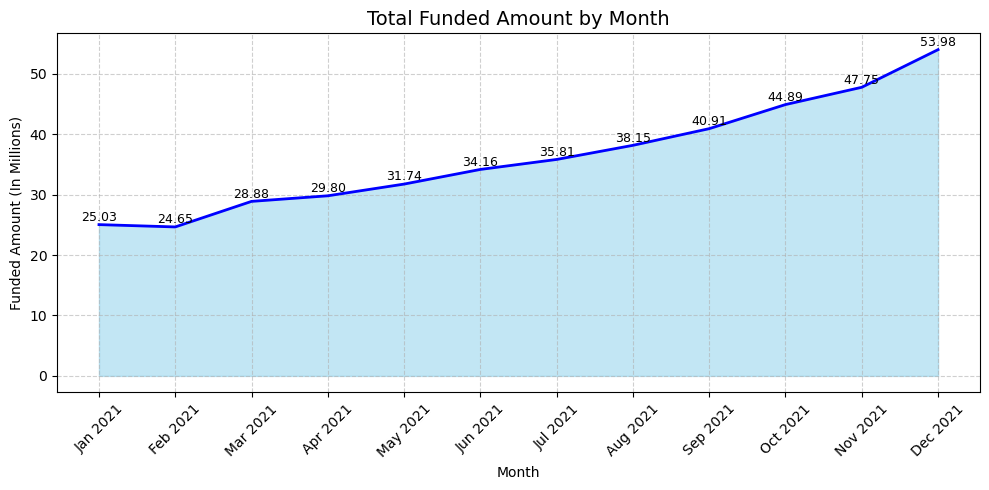

In [90]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
x = range(len(monthly_funded))
y = monthly_funded['loan_amount_millions']

plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.plot(x, y, color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(
        i,
        row['loan_amount_millions'] + 0.1,
        f"{row['loan_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (In Millions)')
plt.xticks(ticks=x, labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

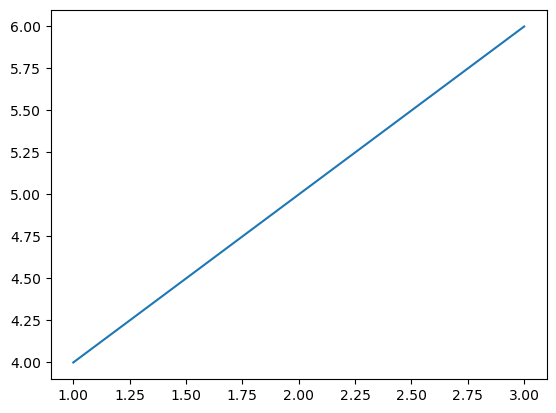

In [89]:
import matplotlib.pyplot as plt
plt.plot([1,2,3], [4,5,6])
plt.show()

### Monthly Trends by Issue Date for Total Amount Received

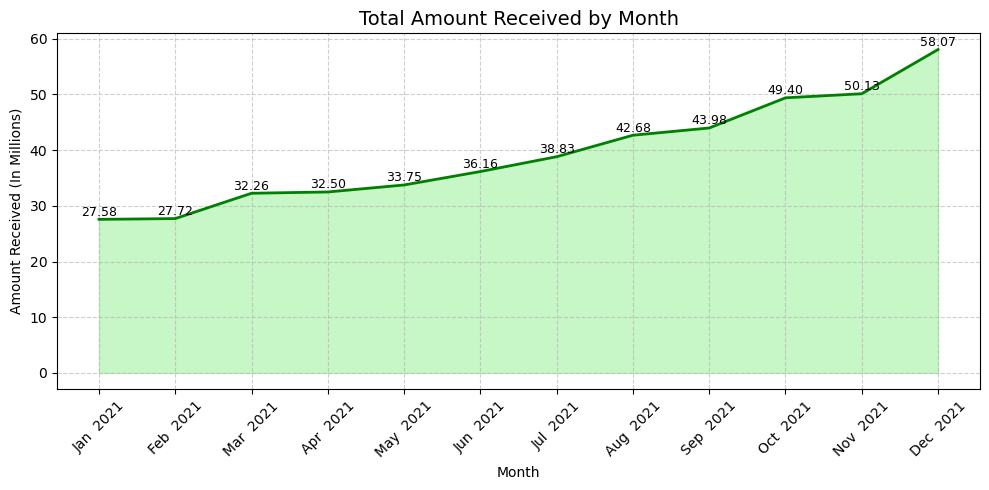

In [93]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b  %Y'))
      .groupby('month_name',sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name = 'received_amount_millions')
)

plt.figure(figsize=(10,5))
x = range(len(monthly_received))                         # numeric x positions
y = monthly_received['received_amount_millions']         # y values from received table

plt.fill_between(x, y, color='lightgreen', alpha=0.5)
plt.plot(x, y, color='green', linewidth=2)                # fixed 'linewidth' typo

# data labels (one label per point)
for i, row in monthly_received.iterrows():
    plt.text(
        i,
        row['received_amount_millions'] + 0.1,
        f"{row['received_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Amount Received by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Amount Received (In Millions)')
plt.xticks(ticks=x, labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Loan Applications

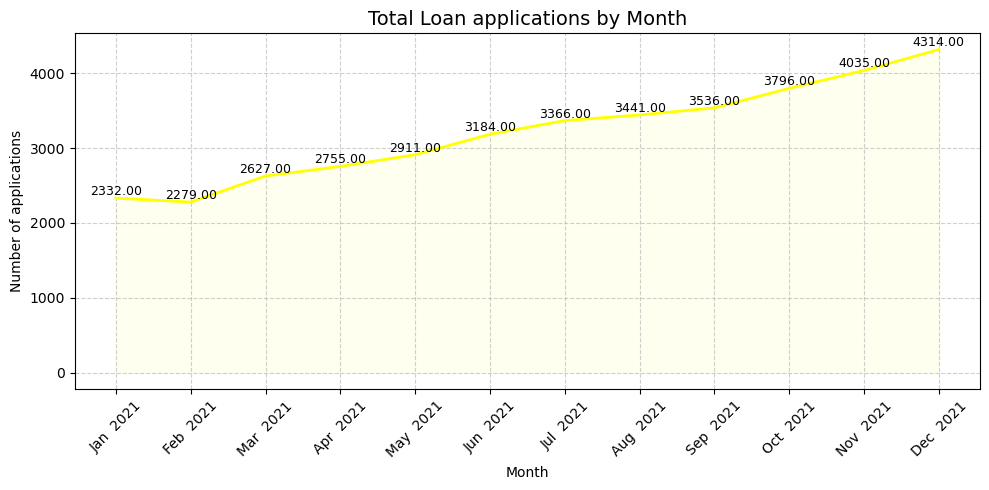

In [96]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b  %Y'))
      .groupby('month_name',sort=False)['id']
      .count()
      .reset_index(name = 'loan_applications_count')
)

plt.figure(figsize=(10,5))
x = range(len(monthly_applications))                         # numeric x positions
y = monthly_applications['loan_applications_count']         # y values from received table

plt.fill_between(x, y, color='lightyellow', alpha=0.5)
plt.plot(x, y, color='yellow', linewidth=2)                # fixed 'linewidth' typo

# data labels (one label per point)
for i, row in monthly_applications.iterrows():
    plt.text(
        i,
        row['loan_applications_count'] + 0.1,
        f"{row['loan_applications_count']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Loan applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of applications')
plt.xticks(ticks=x, labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis By State(Bar Chart)

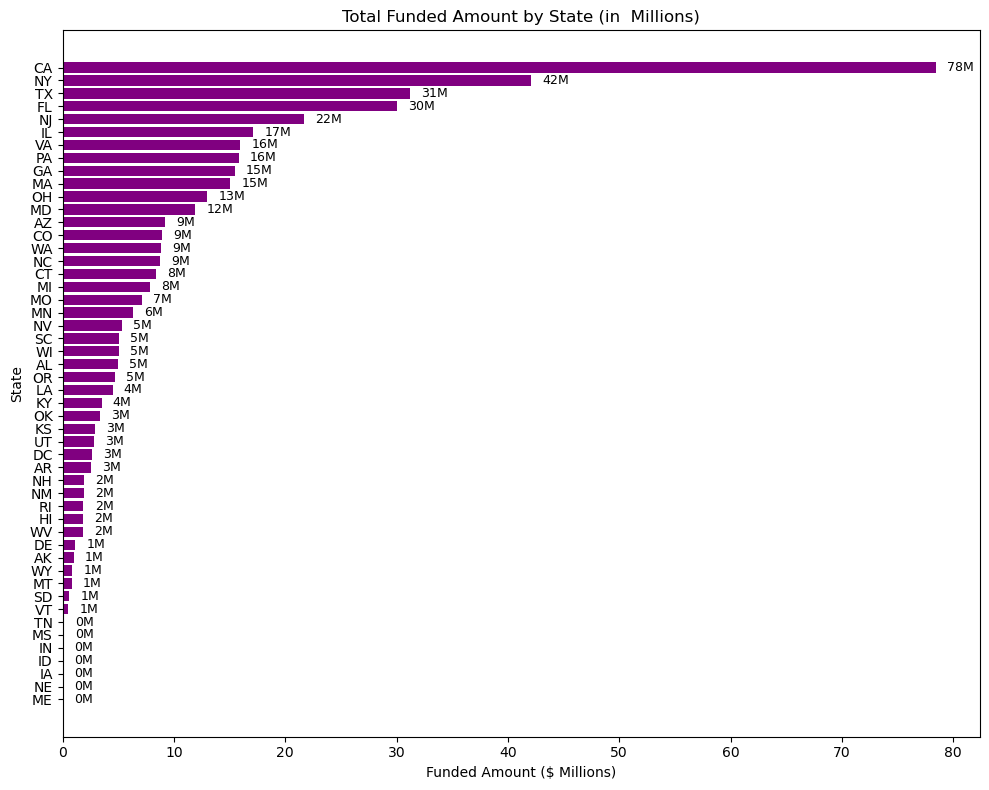

In [109]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_millions = state_funding / 1000000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_millions.index, state_funding_millions.values, color='purple')

# where to show the labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.0f}M',
        va='center',
        fontsize=9
    )

plt.title('Total Funded Amount by State (in  Millions)')
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Regional Analysis By State for Total Amount Received

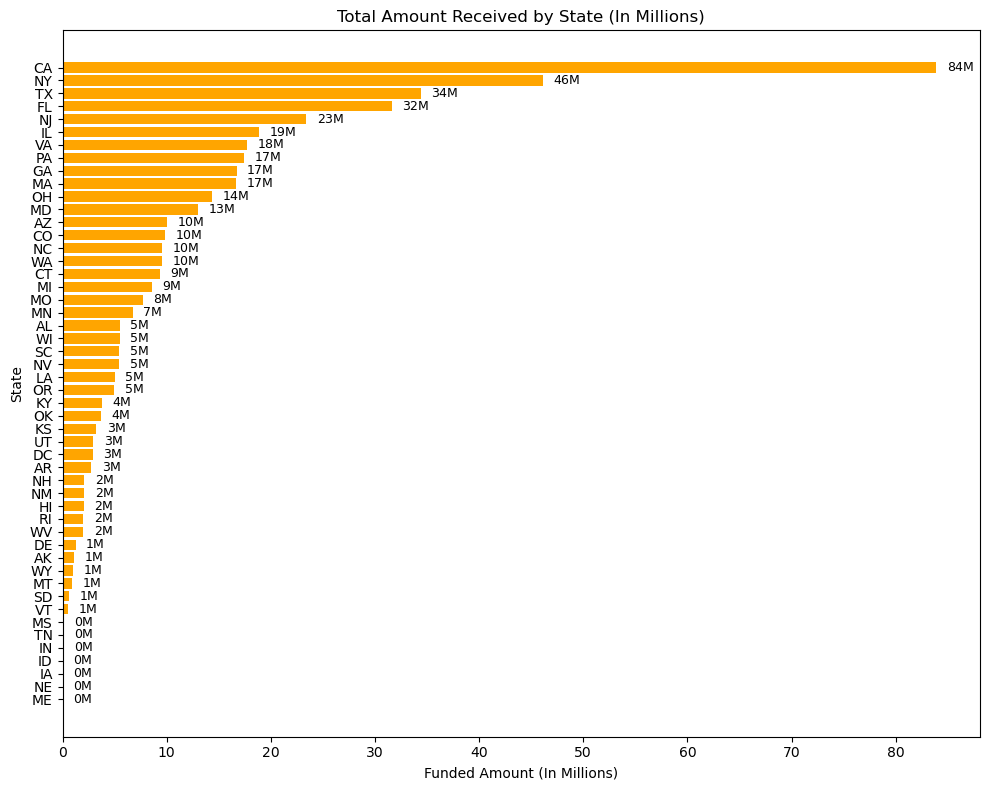

In [115]:

state_funding = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_funding_millions = state_funding / 1000000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_millions.index, state_funding_millions.values, color = 'orange')

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}M',
        va='center',
        fontsize=9
    )

plt.title('Total Amount Received by State (In Millions)')
plt.xlabel('Funded Amount (In Millions)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Regional Analysis By State for total loan applications

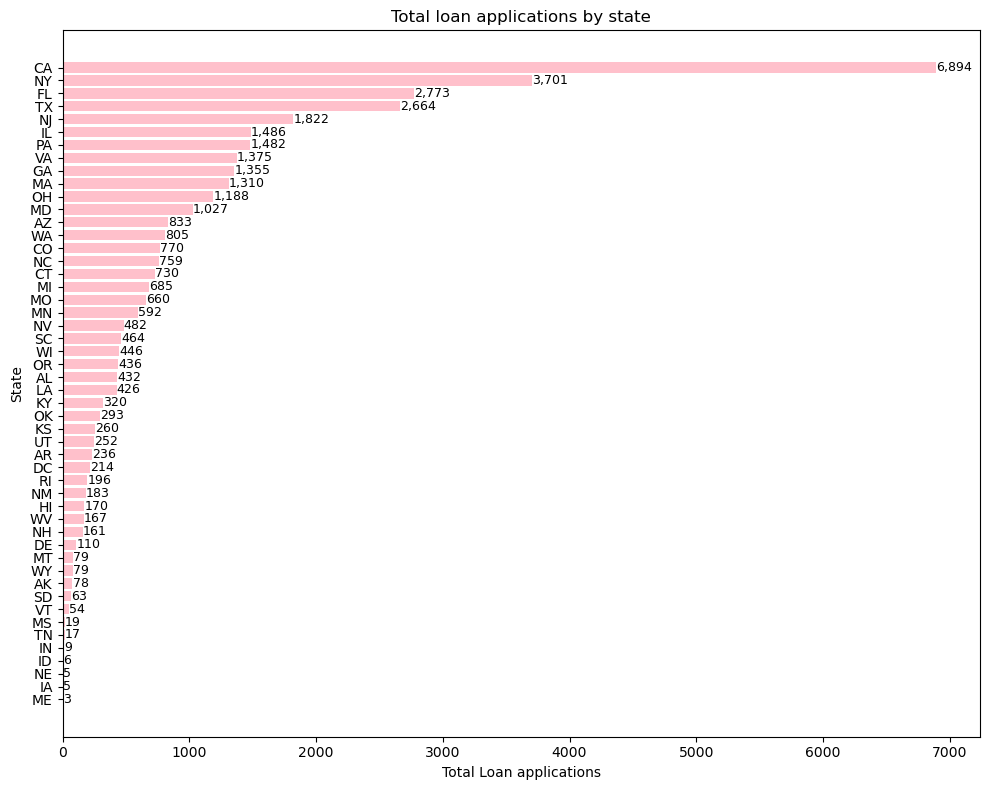

In [124]:
state_loan_applications = df.groupby('address_state')['id'].count().sort_values(ascending = True)

plt.figure(figsize=(10,8))
bars = plt.barh(state_loan_applications.index, state_loan_applications.values, color = 'pink')

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1, 
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',
        va = 'center',
        fontsize = 9
    )
plt.title("Total loan applications by state")
plt.xlabel('Total Loan applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount(Donut Chart)

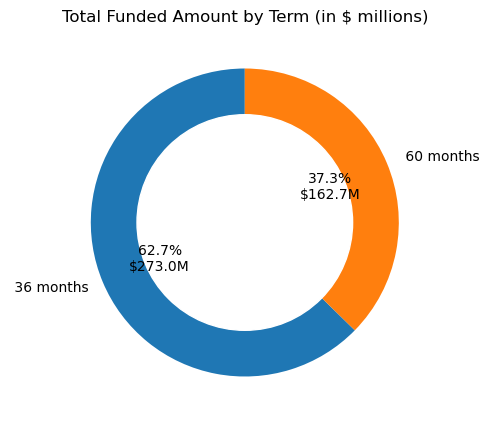

In [139]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize = (5,5))

plt.pie(term_funding_millions,
       labels = term_funding_millions.index,
       autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
       startangle = 90,
       wedgeprops = {'width' : 0.4}
       )
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color = 'white'))
plt.title("Total Funded Amount by Term (in $ millions)")
plt.show()

### Loan Term Analysis by Total Amount Received(Donut Chart)

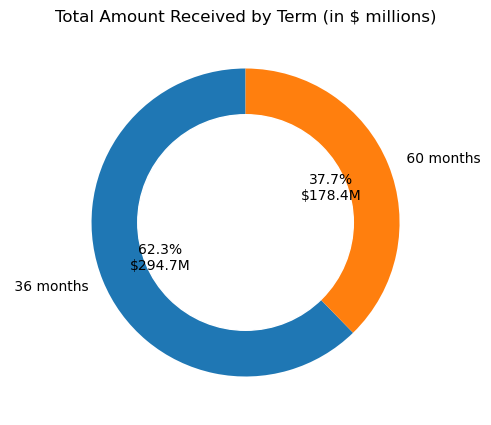

In [141]:
term_funding_millions = df.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize = (5,5))

plt.pie(term_funding_millions,
       labels = term_funding_millions.index,
       autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
       startangle = 90,
       wedgeprops = {'width' : 0.4}
       )
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color = 'white'))
plt.title("Total Amount Received by Term (in $ millions)")
plt.show()

### Loan Term Analysis by Total Loan Applications(Donut Chart)

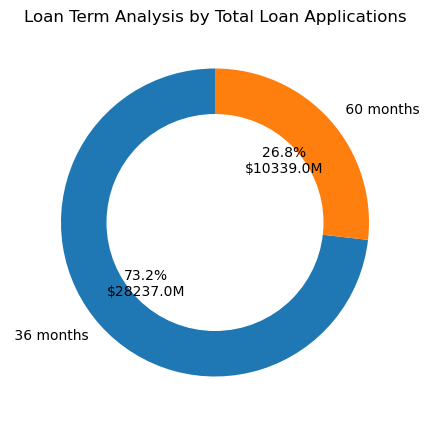

In [7]:
loan_applications_by_term = df.groupby('term')['id'].count()

plt.figure(figsize = (5,5))

plt.pie(loan_applications_by_term,
       labels = loan_applications_by_term.index,
       autopct = lambda p: f"{p:.1f}%\n${p*sum(loan_applications_by_term)/100:.1f}M",
       startangle = 90,
       wedgeprops = {'width' : 0.4}
       )
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color = 'white'))
plt.title("Loan Term Analysis by Total Loan Applications")
plt.show()

### Employee Length Analysis by Total Funded Amount

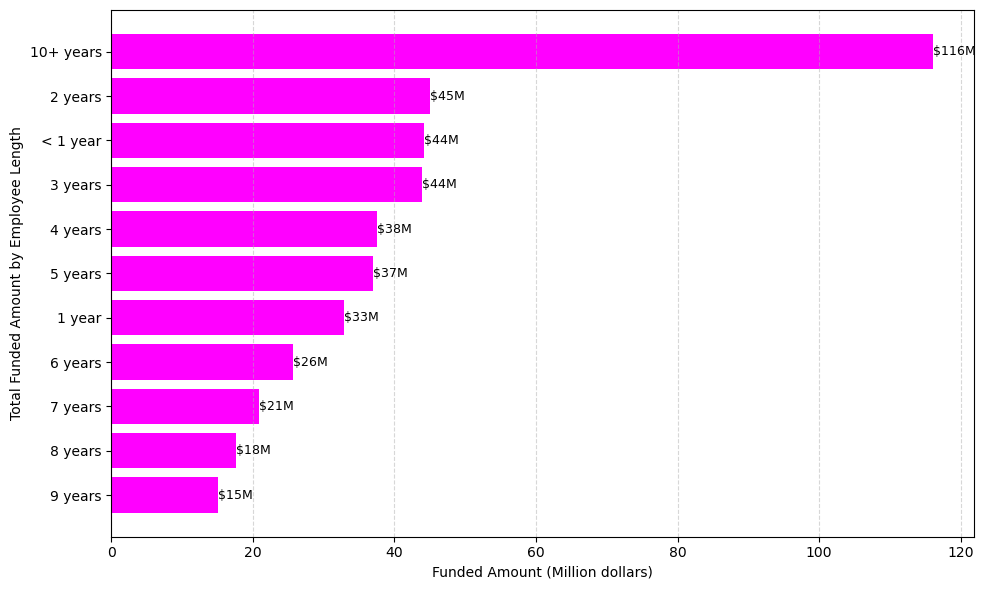

In [12]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_funding.index, emp_funding.values, color = 'magenta')

for bar in bars :
    width = bar.get_width()
    plt.text(width,
             bar.get_y() + bar.get_height() / 2,
             f"${width:,.0f}M",
             va = 'center', 
             fontsize = 9,
             color = 'black')

plt.xlabel("Funded Amount (Million dollars)")
plt.ylabel("Total Funded Amount by Employee Length")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Employee Length Analysis by Total Amount Received

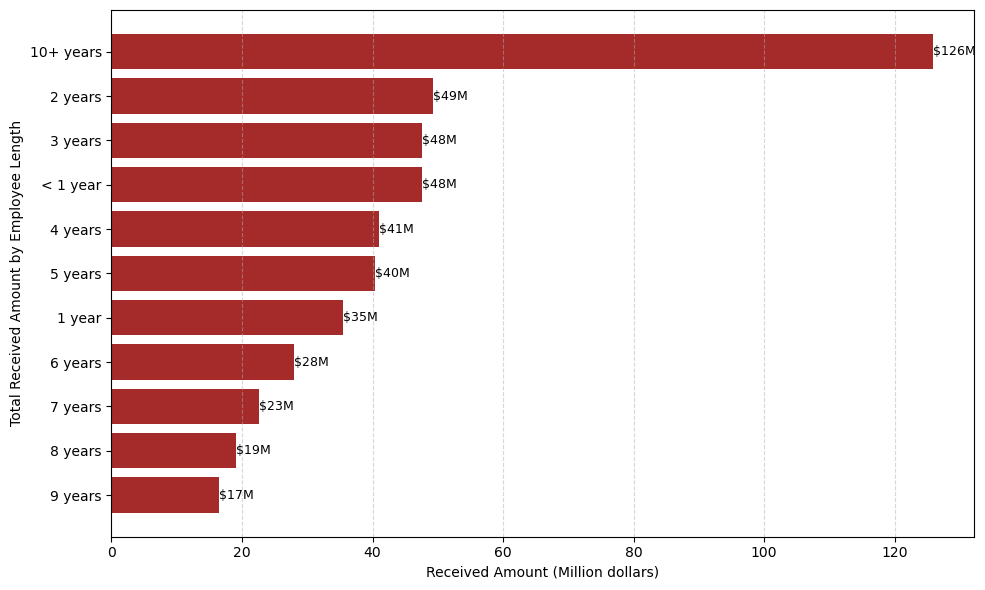

In [14]:
emp_received = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_received.index, emp_received.values, color = 'brown')

for bar in bars :
    width = bar.get_width()
    plt.text(width,
             bar.get_y() + bar.get_height() / 2,
             f"${width:,.0f}M",
             va = 'center', 
             fontsize = 9,
             color = 'black')

plt.xlabel("Received Amount (Million dollars)")
plt.ylabel("Total Received Amount by Employee Length")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Employee Length Analysis by Total Loan Applications

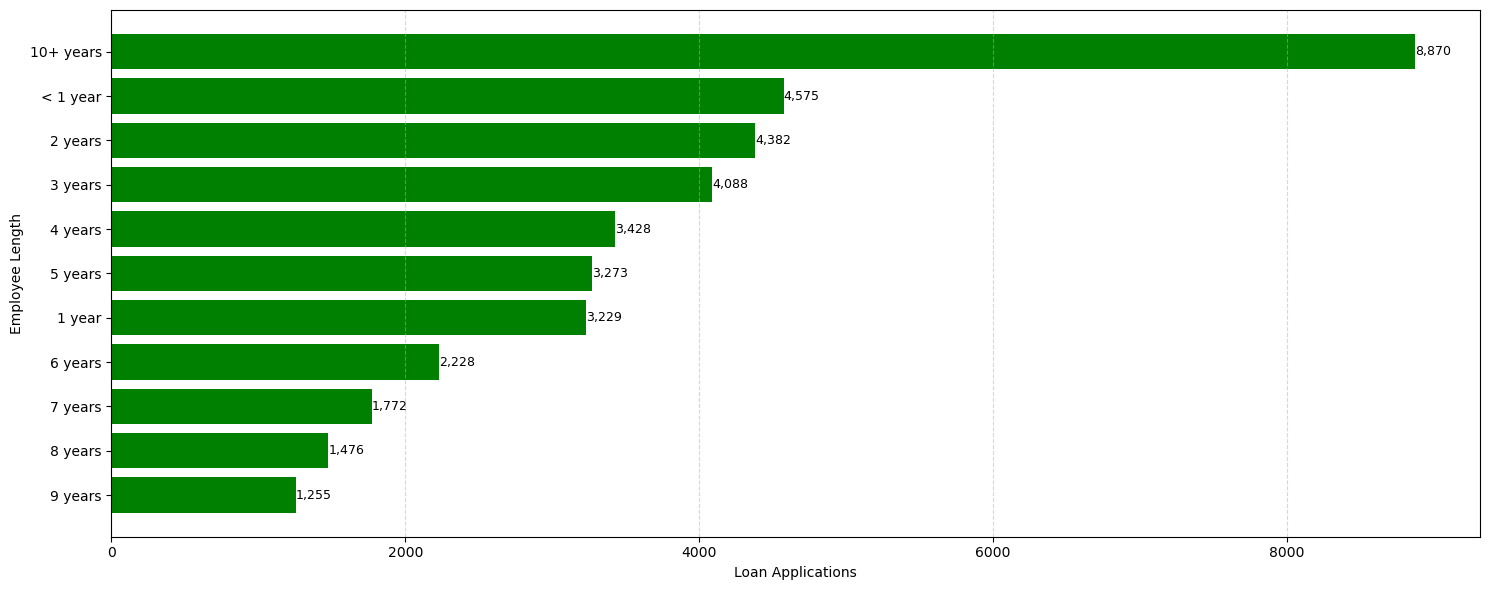

In [27]:
emp_length_by_applications = df.groupby('emp_length')['id'].count().sort_values()

plt.figure(figsize = (15,6))
bars = plt.barh(emp_length_by_applications.index, emp_length_by_applications.values, color = 'green')

for bar in bars :
    width = bar.get_width()
    plt.text(width,
             bar.get_y() + bar.get_height() / 2,
             f"{width:,}",
             va = 'center', 
             fontsize = 9,
             color = 'black')

plt.xlabel("Loan Applications")
plt.ylabel("Employee Length")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Loan Purpose Breakdown by Total Funded Amount (Bar Chart)

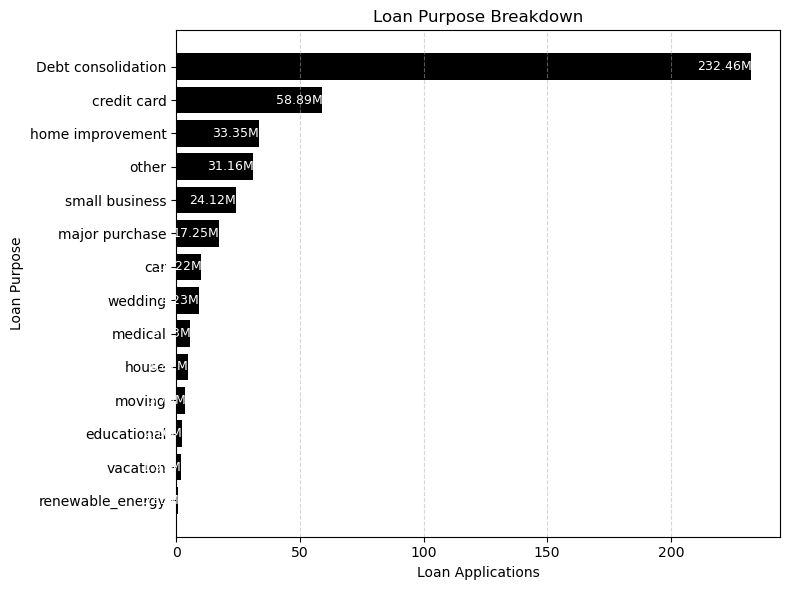

In [37]:
loan_purpose = df.groupby('purpose')['loan_amount'].sum().sort_values()
loan_purpose_millions = loan_purpose / 1000000

plt.figure(figsize = (8,6))
bars = plt.barh(loan_purpose_millions.index, loan_purpose_millions.values, color = 'black')

for bar in bars :
    width = bar.get_width()
    plt.text(width + 0.2,
             bar.get_y() + bar.get_height() / 2,
             F"{width:,.2f}M",
             va = 'center',
             ha = 'right',
             fontsize = 9,
             color = 'white'
    )

plt.title("Loan Purpose Breakdown")
plt.xlabel("Total AMount Funded in Million Dollars")
plt.ylabel("Loan Purpose")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()


### Loan Purpose Breakdown by Total Amount Received(Bar Chart)

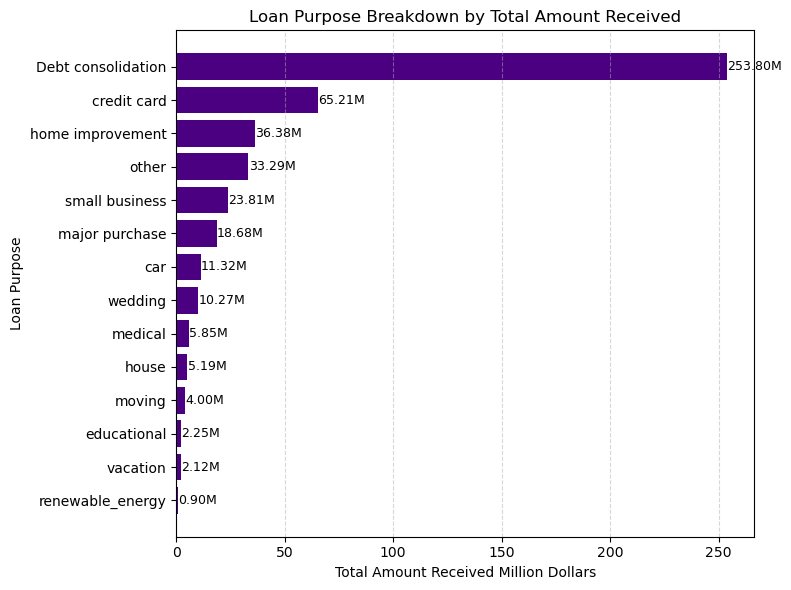

In [39]:
loan_purpose = df.groupby('purpose')['total_payment'].sum().sort_values()
loan_purpose_millions = loan_purpose / 1000000

plt.figure(figsize = (8,6))
bars = plt.barh(loan_purpose_millions.index, loan_purpose_millions.values, color = 'indigo')

for bar in bars :
    width = bar.get_width()
    plt.text(width + 0.2,
             bar.get_y() + bar.get_height() / 2,
             F"{width:,.2f}M",
             va = 'center',
             fontsize = 9,
             color = 'black'
    )

plt.title("Loan Purpose Breakdown by Total Amount Received")
plt.xlabel("Total Amount Received Million Dollars")
plt.ylabel("Loan Purpose")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Loan Purpose Breakdown by Total Loan Applications(Bar Chart)

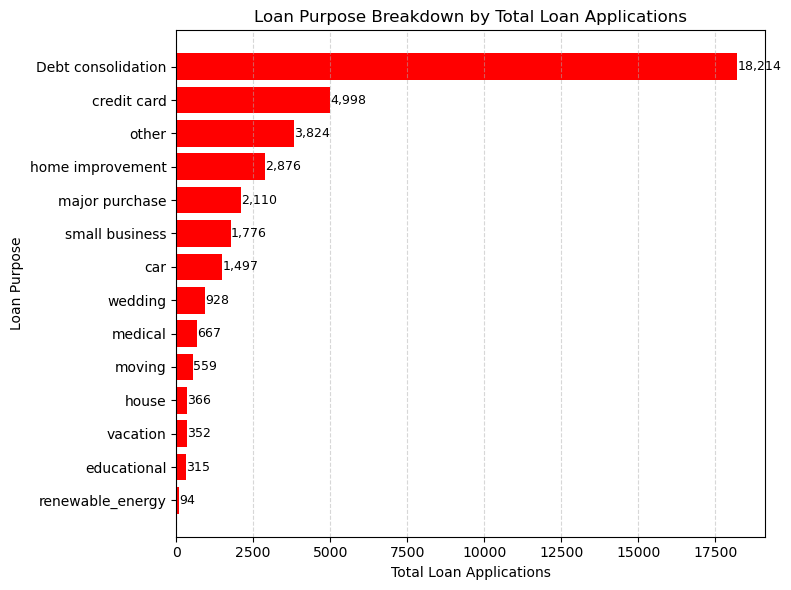

In [43]:
loan_purpose = df.groupby('purpose')['id'].count().sort_values()


plt.figure(figsize = (8,6))
bars = plt.barh(loan_purpose.index, loan_purpose.values, color = 'red')

for bar in bars :
    width = bar.get_width()
    plt.text(width + 1,
             bar.get_y() + bar.get_height() / 2,
             F"{width:,}",
             va = 'center',
             fontsize = 9,
             color = 'black'
    )

plt.title("Loan Purpose Breakdown by Total Loan Applications")
plt.xlabel("Total Loan Applications")
plt.ylabel("Loan Purpose")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Home Ownership Analysis by Total Funded Amount(Tree / Heat Map)

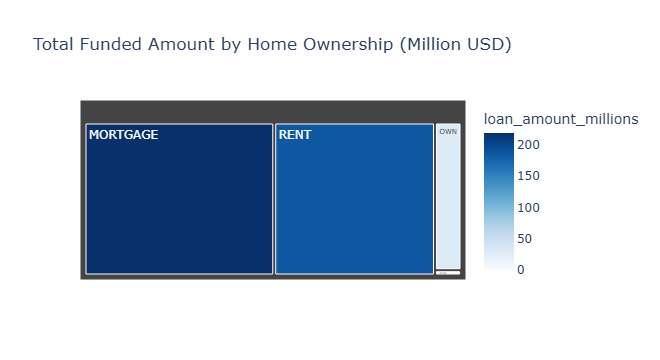

In [51]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path = ['home_ownership'],
    values = 'loan_amount_millions',
    color = 'loan_amount_millions',
    color_continuous_scale = 'Blues',
    title = 'Total Funded Amount by Home Ownership (Million USD)'
)

fig.update_traces(hovertemplate = '<b>%{label}<b><br>Amount: %{value:.1f}M')

fig.show()

### Home Ownership Analysis by Total Amount Received(Tree / Heat Map)

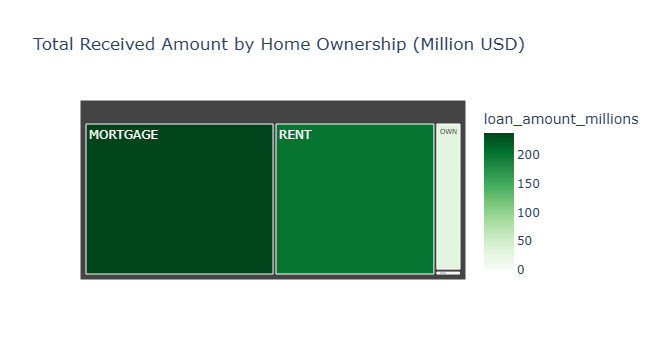

In [56]:
home_funding = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['total_payment'] / 1000000

fig = px.treemap(
      home_funding,
      path = ['home_ownership'],
      values = 'loan_amount_millions',
      color = 'loan_amount_millions',
      color_continuous_scale = 'greens',
      title = 'Total Received Amount by Home Ownership (Million USD)'
)

fig.update_traces(hovertemplate = '<b>%{label}<b><br>Amount: %{value:.1f}M')

fig.show()

### Home Ownership Analysis by Total Loan Applications(Tree / Heat Map)

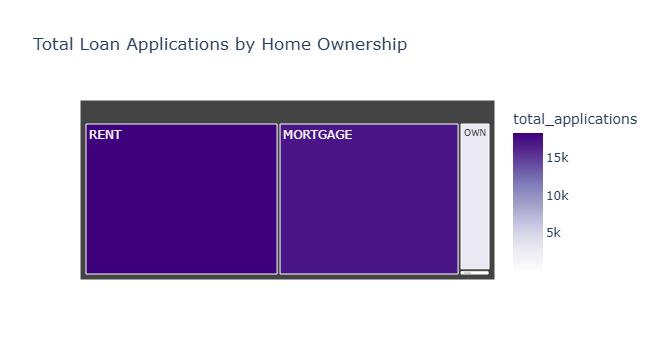

In [61]:
home_funding = df.groupby('home_ownership')['id'].count().reset_index()
home_funding.columns = ['home_ownership', 'total_applications']

fig = px.treemap(
    home_funding,
    path = ['home_ownership'],
    values = 'total_applications',
    color = 'total_applications',
    color_continuous_scale = 'Purples',
    title = 'Total Loan Applications by Home Ownership'
)

fig.show()